In [218]:
import time
import numpy as np
import pandas as pd
from numba import jit

job_seekers = pd.read_csv('data/jobseekers.csv')
jobs = pd.read_csv('data/jobs.csv')

In [223]:
job_values = jobs.values
job_seekers_values = job_seekers.values

## get skill sets for each job seeker
job_seeker_skills_sets = [set(js[2].split(', ')) for js in job_seekers_values]

## get skill sets for each job
job_skills_sets = [set(j[2].split(', ')) for j in job_values]

## allocate empty numpy array
job_matches = np.empty((len(jobs)*len(job_seekers), 6), dtype=object)

start_time = time.time()

index = 0
for js_idx, job_seeker in enumerate(job_seekers_values):
    job_seeker_id, job_seeker_name = job_seeker[:2] # get first two items of array (seeker id and seeker name)

    for job_idx, job in enumerate(job_values):
        job_id, job_title = job[:2] # get first two items of array (job id and job title)

        matched_skills = job_seeker_skills_sets[js_idx].intersection(job_skills_sets[job_idx]) # get matched skills via set intersection
        matched_skills_percent = (len(matched_skills) / len(job_skills_sets[job_idx])) * 100

        job_matches[index] = [job_seeker_id, job_seeker_name, job_id, job_title, len(matched_skills), matched_skills_percent]
        index+=1

print("Execution time: ", time.time() - start_time)

matched_jobs_df = pd.DataFrame(job_matches, columns=['Job Seeker ID', 'Job Seeker Name', 'Job ID', 'Job Title', 'Matching skill count', 'Matched skills percent'])
matched_jobs_df

Execution time:  0.0


,Job Seeker ID,Job Seeker Name,Job ID,Job Title,Matching skill count,Matched skills percent
0,1,Alice Seeker,1,Ruby Developer,3,100.0
1,1,Alice Seeker,2,Frontend Developer,0,0.0
2,1,Alice Seeker,3,Backend Developer,2,50.0
3,1,Alice Seeker,4,Fullstack Developer,2,33.333333
4,1,Alice Seeker,5,Machine Learning Engineer,0,0.0
...,...,...,...,...,...,...
95,10,Jane Applicant,6,Cloud Architect,0,0.0
96,10,Jane Applicant,7,Data Analyst,0,0.0
97,10,Jane Applicant,8,Web Developer,1,25.0
98,10,Jane Applicant,9,Python Developer,1,25.0


# Testing

In [199]:
import time
import numpy as np
import pandas as pd

job_seekers = pd.read_csv('data/jobseekers_large.csv')
jobs = pd.read_csv('data/jobs_large.csv')

job_seekers.dropna(axis=0, inplace=True)
job_seekers.reset_index(drop=True, inplace=True)
jobs.dropna(axis=0, inplace=True)
jobs.reset_index(drop=True, inplace=True)

In [212]:
def simulate_match_jobs(n_samples, n_iterations):
    job_values = jobs.values[:n_samples]
    job_seekers_values = job_seekers.values[:n_samples]

    ## get skill sets for each job seeker
    job_seeker_skills_sets = [set(js[2].split(', ')) for js in job_seekers_values]

    ## get skill sets for each job
    job_skills_sets = [set(j[2].split(', ')) for j in job_values]

    ## allocate empty numpy array
    job_matches = np.empty((len(jobs)*len(job_seekers), 6), dtype=object)

    times = []
    for _ in range(0,n_iterations):
        start_time = time.time()

        index = 0
        for js_idx, job_seeker in enumerate(job_seekers_values):
            job_seeker_id, job_seeker_name = job_seeker[:2] # get first two items of array (seeker id and seeker name)

            for job_idx, job in enumerate(job_values):
                job_id, job_title = job[:2] # get first two items of array (job id and job title)

                matched_skills = job_seeker_skills_sets[js_idx].intersection(job_skills_sets[job_idx]) # get matched skills via set intersection
                matched_skills_percent = (len(matched_skills) / len(job_skills_sets[job_idx])) * 100

                job_matches[index] = [job_seeker_id, job_seeker_name, job_id, job_title, len(matched_skills), matched_skills_percent]
                index+=1

        times.append(time.time() - start_time)

    avg_time = sum(times)/len(times)
    #print("Average execution time: ", avg_time)

    return avg_time

100%|██████████| 99/99 [00:27<00:00,  3.62it/s]


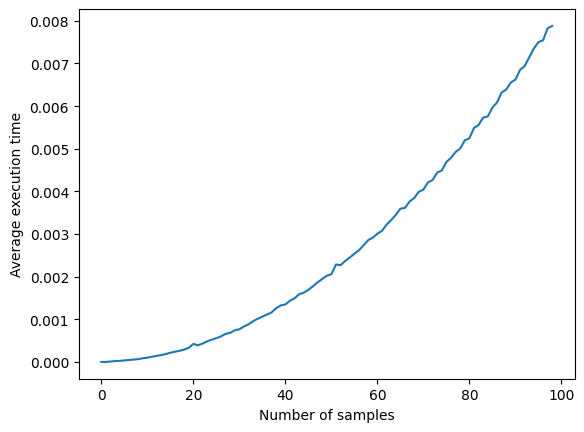

In [213]:
import matplotlib.pyplot as plt
from tqdm import tqdm

avg_times = []
for i in tqdm(range(1,100)):
  avg_time = simulate_match_jobs(i, 100)
  avg_times.append(avg_time)

plt.plot(avg_times)
plt.xlabel('Number of samples')
plt.ylabel('Average execution time')
plt.show()